In [7]:
# ruff: noqa: E501

import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.equinor_utilities.std_functions import (
    hashin_shtrikman,
    hashin_shtrikman_average,
    reuss,
    voigt,
    voigt_reuss_hill,
)

In [8]:
frac_q = np.linspace(0.0, 1.0, 101)
quartz_k = 36.8e9 * np.ones_like(frac_q)
quartz_mu = 44.0e9 * np.ones_like(frac_q)

shale_k = 15.0e9 * np.ones_like(frac_q)
shale_mu = 7.5e9 * np.ones_like(frac_q)


frac_sh = 1.0 - frac_q

reuss_mix = reuss(quartz_k, quartz_mu, shale_k, shale_mu, frac_q)
voigt_mix = voigt(quartz_k, quartz_mu, shale_k, shale_mu, frac_q)
vrh_mix = voigt_reuss_hill(quartz_k, quartz_mu, shale_k, shale_mu, frac_q)

hs_upper = hashin_shtrikman(quartz_k, quartz_mu, shale_k, shale_mu, frac_q)
hs_lower = hashin_shtrikman(shale_k, shale_mu, quartz_k, quartz_mu, frac_sh)
hs_ave = hashin_shtrikman_average(quartz_k, quartz_mu, shale_k, shale_mu, frac_q)

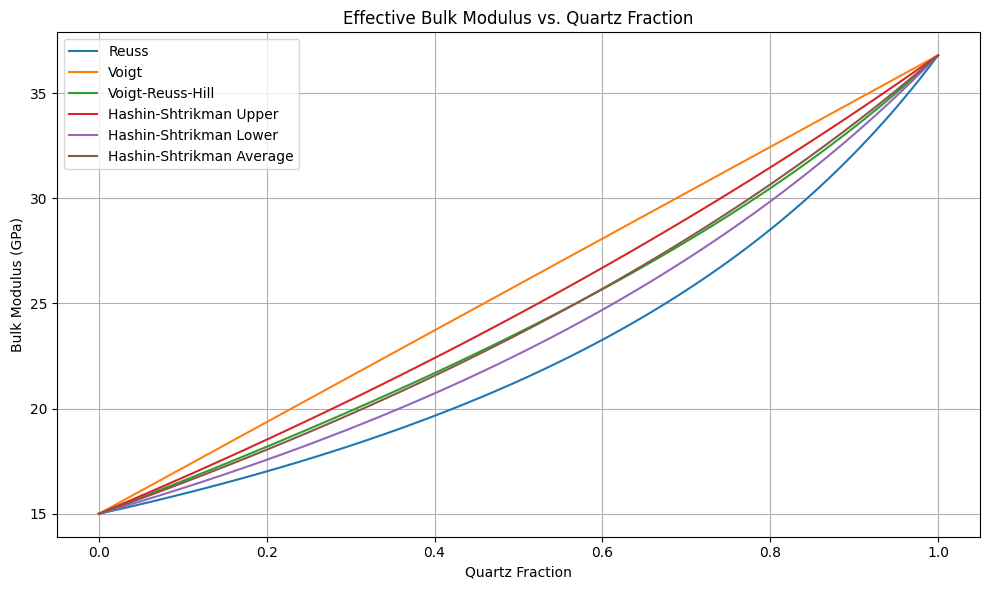

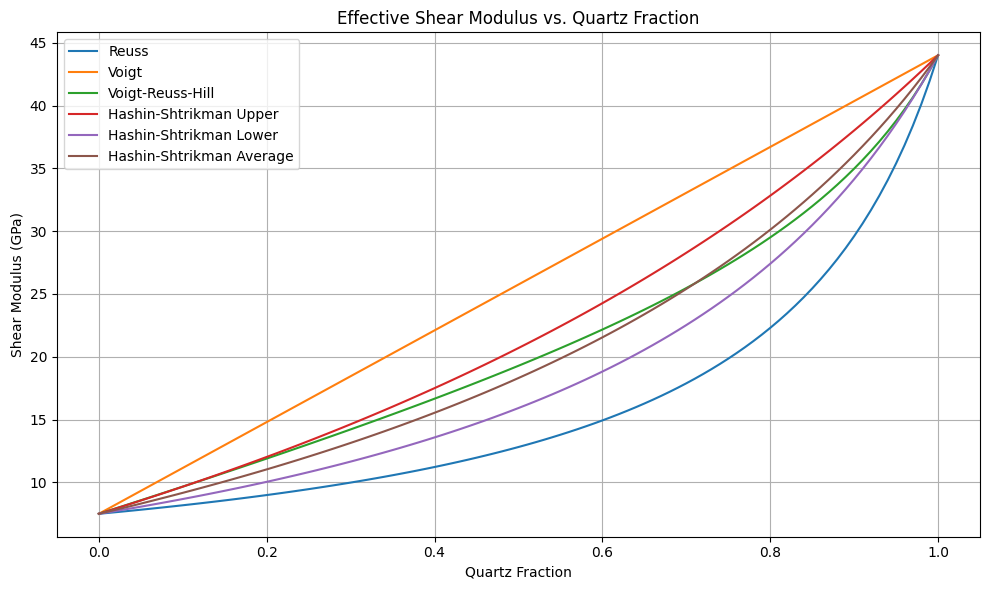

In [10]:
# Create figure for bulk modulus (k)
plt.figure(figsize=(10, 6))
plt.plot(frac_q, reuss_mix[0] / 1e9, label="Reuss")
plt.plot(frac_q, voigt_mix[0] / 1e9, label="Voigt")
plt.plot(frac_q, vrh_mix[0] / 1e9, label="Voigt-Reuss-Hill")
plt.plot(frac_q, hs_upper[0] / 1e9, label="Hashin-Shtrikman Upper")
plt.plot(frac_q, hs_lower[0] / 1e9, label="Hashin-Shtrikman Lower")
plt.plot(frac_q, hs_ave[0] / 1e9, label="Hashin-Shtrikman Average")

plt.xlabel("Quartz Fraction")
plt.ylabel("Bulk Modulus (GPa)")
plt.title("Effective Bulk Modulus vs. Quartz Fraction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("bulk_modulus_vs_quartz_fraction.png", dpi=300)
plt.show()

# Create figure for shear modulus (mu)
plt.figure(figsize=(10, 6))
plt.plot(frac_q, reuss_mix[1] / 1e9, label="Reuss")
plt.plot(frac_q, voigt_mix[1] / 1e9, label="Voigt")
plt.plot(frac_q, vrh_mix[1] / 1e9, label="Voigt-Reuss-Hill")
plt.plot(frac_q, hs_upper[1] / 1e9, label="Hashin-Shtrikman Upper")
plt.plot(frac_q, hs_lower[1] / 1e9, label="Hashin-Shtrikman Lower")
plt.plot(frac_q, hs_ave[1] / 1e9, label="Hashin-Shtrikman Average")

plt.xlabel("Quartz Fraction")
plt.ylabel("Shear Modulus (GPa)")
plt.title("Effective Shear Modulus vs. Quartz Fraction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("shear_modulus_vs_quartz_fraction.png", dpi=300)
plt.show()